<a href="https://colab.research.google.com/github/ivvnn/LE2_Hernandez_IJ/blob/main/LE2_HERNANDEZ_IJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/sample_data/online_shoppers_intention.csv')

data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
#check for missing and duplicate values
data = pd.read_csv('/content/sample_data/online_shoppers_intention.csv')

data.head()

print('Missing values:')
print(data.isnull().sum())

duplicate_rows = data[data.duplicated()]
if duplicate_rows.shape[0] == 0:
  print('No duplicates found')
else:
  print('Duplicates found')
  data.drop_duplicates(inplace=True)

data.reset_index(drop=True, inplace=True)
print("Data shape after removing duplicates:", data.shape)

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Duplicates found
Data shape after removing duplicates: (12205, 18)


In [8]:
#conversion of month into a numerical data
print(data.dtypes)

data['Month'] = data['Month'].map({
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
})

data['VisitorType'] = data['VisitorType'].map({
    'Returning_Visitor': 1, 'New_Visitor': 0, 'Other': 2
})
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.dropna()

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


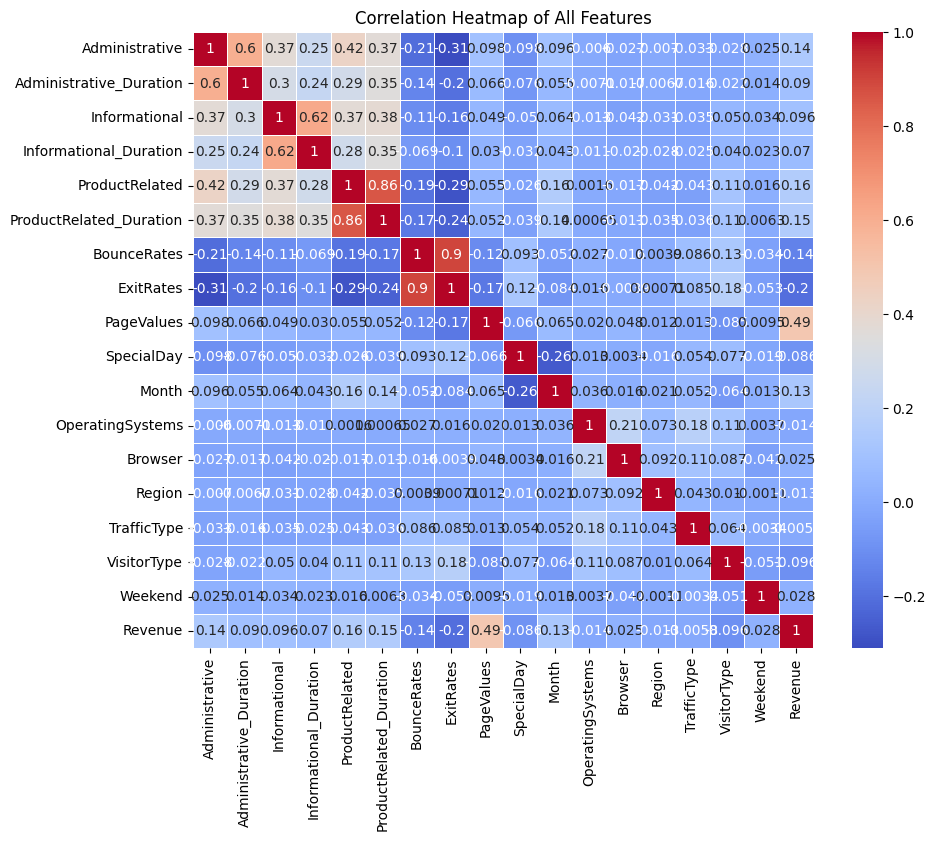

Naive Bayes Accuracy: 84.81543624161074
Logistic Regression Accuracy: 87.83557046979867
Decision Tree Accuracy: 86.0738255033557
Random Forest Accuracy: 90.18456375838926
SVM Accuracy: 84.01845637583892


In [18]:
#check for correlation of all features
correlation_matrix_all = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

X = numeric_data.drop('Revenue', axis=1)
y = numeric_data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb) * 100}')

log_reg = LogisticRegression(max_iter=30000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg) * 100}')

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dec_tree) * 100}')

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rand_forest) * 100}')

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100}')

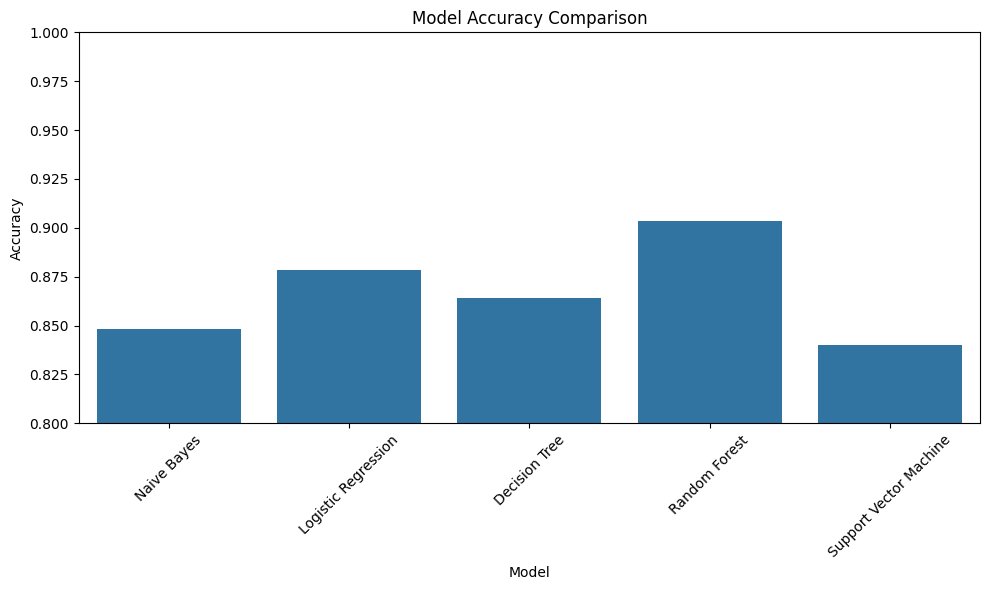

In [13]:
#training and testing of features
random_seed = 42

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=30000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}

results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()),
    "Accuracy": list(results_all_features.values()),
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

In [35]:
#display accuracy score of all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy
    print(classification_report(y_test, predictions))

print("Scores with all features:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}")

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1996
           1       0.53      0.51      0.52       388

    accuracy                           0.85      2384
   macro avg       0.72      0.71      0.72      2384
weighted avg       0.85      0.85      0.85      2384

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1996
           1       0.74      0.39      0.51       388

    accuracy                           0.88      2384
   macro avg       0.82      0.68      0.72      2384
weighted avg       0.87      0.88      0.86      2384

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1996
           1       0.58      0.61      0.59       388

    accuracy                           0.86      2384
   macro avg       0.75      0.76      0.76      2384
weighted avg       0.87      0.86      0.87      2384

              preci

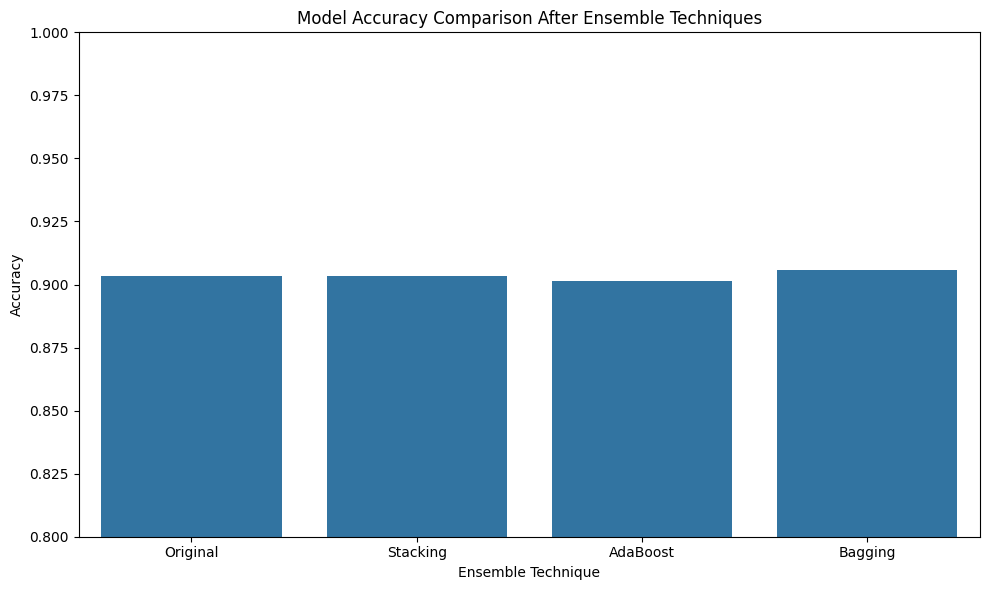

Summary of Model Accuracies:
Highest Model: RandomForestClassifier(random_state=42)
Original: 90.3523
Stacking: 90.3523
AdaBoost: 90.1426
Bagging: 90.5621


In [38]:
#identify the highest machine learning model
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]

highest_model.fit(X_train, y_train)
predictions_highest = highest_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

#ensemble with different classifiers
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=100)
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=100)
bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison After Ensemble Techniques')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

print("Summary of Model Accuracies:")
print("Highest Model:", highest_model)
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy*100:.4f}")